In [6]:
# INF2178 - Assignment3
# Student Name: Jingxian Chen
# Student Number: 1005354572
# Creation Date: March 20, 2024

In [7]:
# Uploaded Excel file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('INF2178_A3_data.csv')
data

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2
...,...,...,...,...,...,...,...,...,...
11928,32.51,25.68,11.694,45.63,24.27,20.189,39000.0,39.0,1
11929,31.96,25.73,21.461,47.84,40.35,32.357,26000.0,26.0,1
11930,40.44,30.50,16.836,49.93,41.00,19.803,45000.0,45.0,2
11931,35.51,28.96,28.864,51.60,50.27,35.991,28000.0,28.0,1


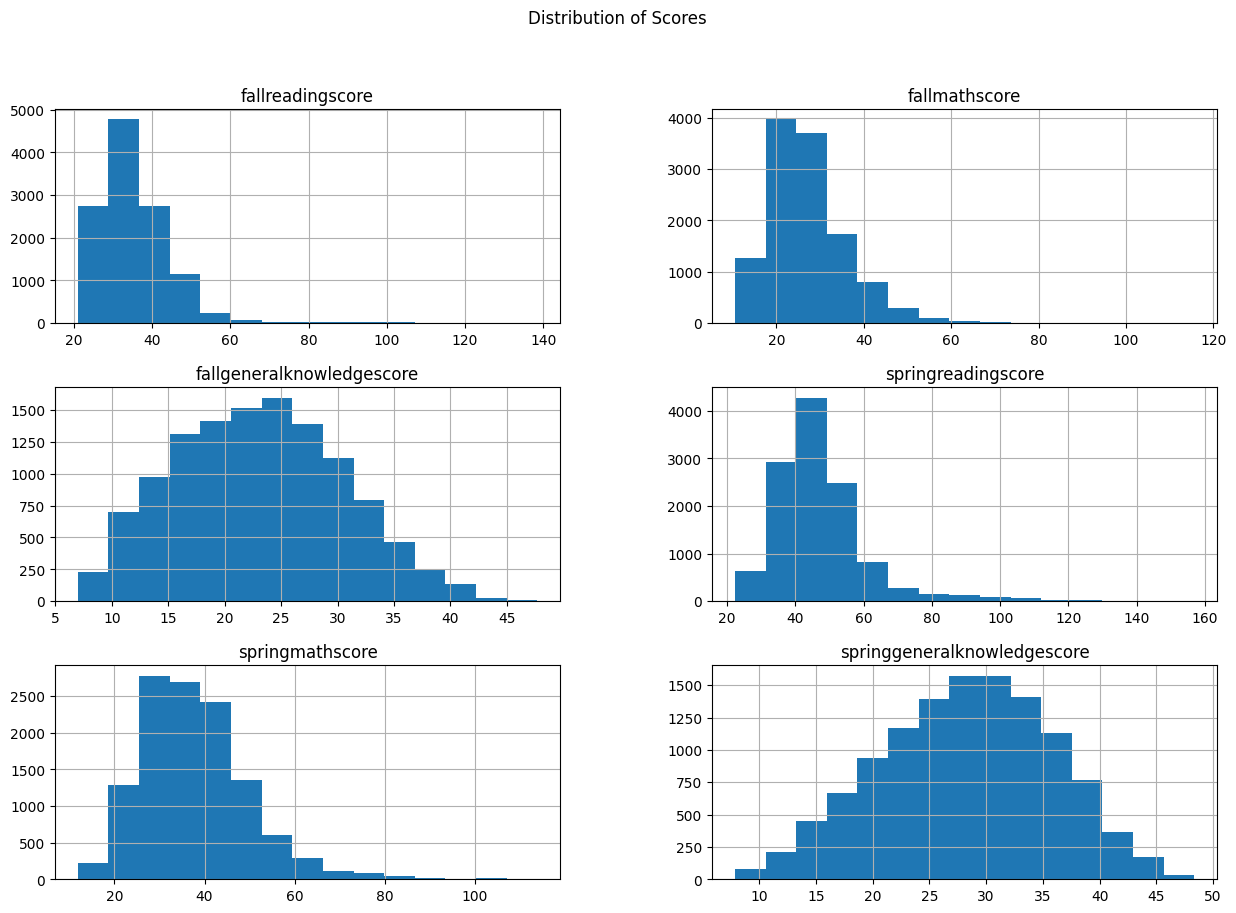

In [8]:
# General EDA for scores

# Distribution plots for scores
data[['fallreadingscore', 'fallmathscore', 'fallgeneralknowledgescore',
      'springreadingscore', 'springmathscore', 'springgeneralknowledgescore']].hist(bins=15,figsize=(15,10))
plt.suptitle('Distribution of Scores')
plt.show()

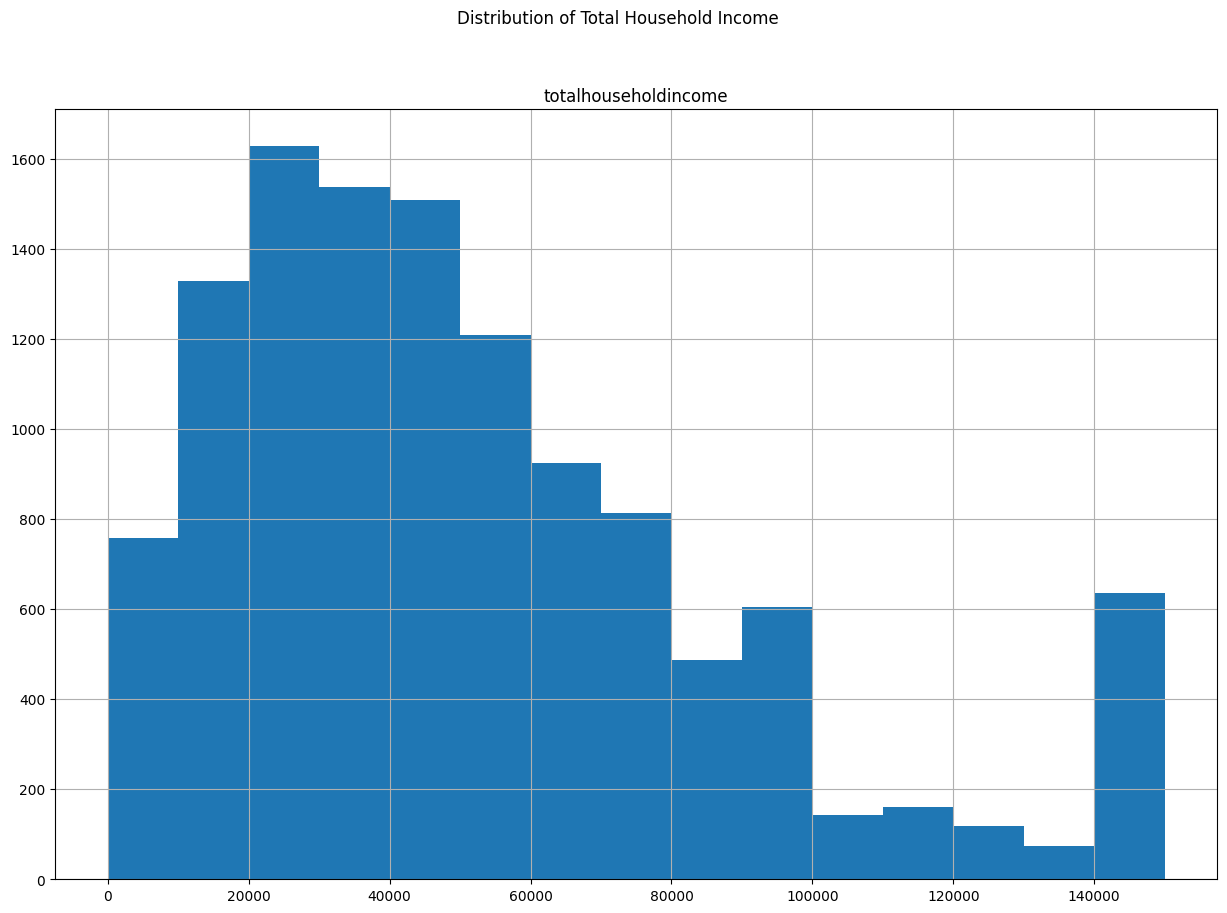

In [9]:
# General EDA for income

# Distribution plots for total household income
data[['totalhouseholdincome']].hist(bins=15,figsize=(15,10))
plt.suptitle('Distribution of Total Household Income')
plt.show()

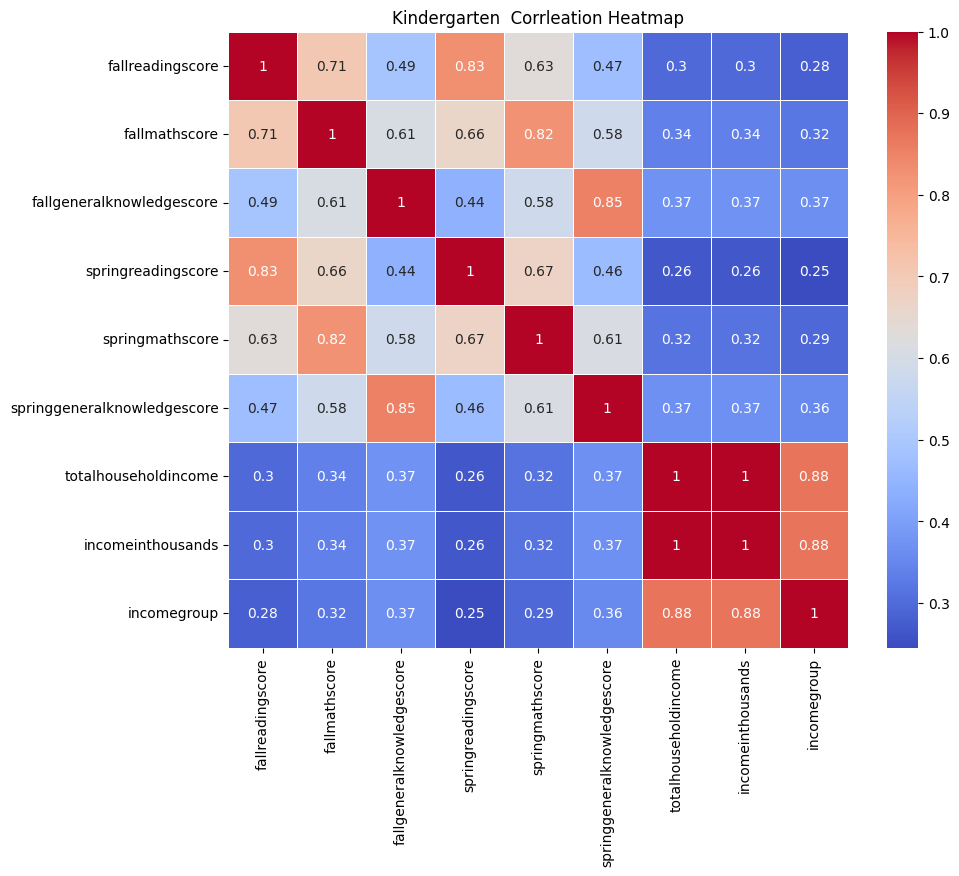

In [10]:
# Setting up the heatmap

correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidth=.5)
plt.title('Kindergarten  Corrleation Heatmap')
plt.show()

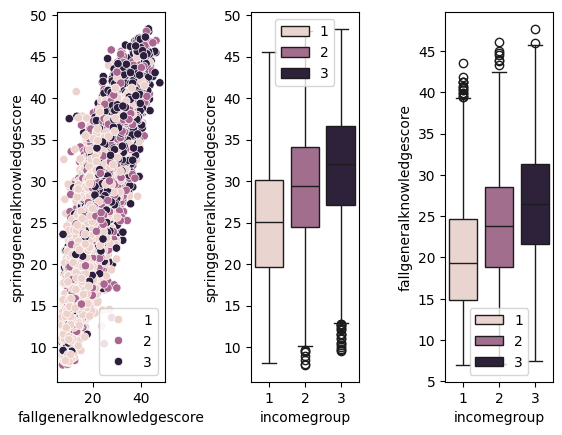

In [11]:
fig, axs = plt.subplots(ncols=3)
plt.subplots_adjust(wspace=0.8)
#Scatter Plot:
sns.scatterplot(data=data, x="fallgeneralknowledgescore", y="springgeneralknowledgescore", hue=data.incomegroup.tolist(), ax=axs[0])
#Box Plot for Spring General Knowledge Scores:
sns.boxplot(data=data, x="incomegroup", y="springgeneralknowledgescore", hue=data.incomegroup.tolist(), ax=axs[1])
#Box Plot for Fall General Knowledge Scores:
sns.boxplot(data=data, x="incomegroup", y="fallgeneralknowledgescore", hue=data.incomegroup.tolist(), ax=axs[2])
plt.show()

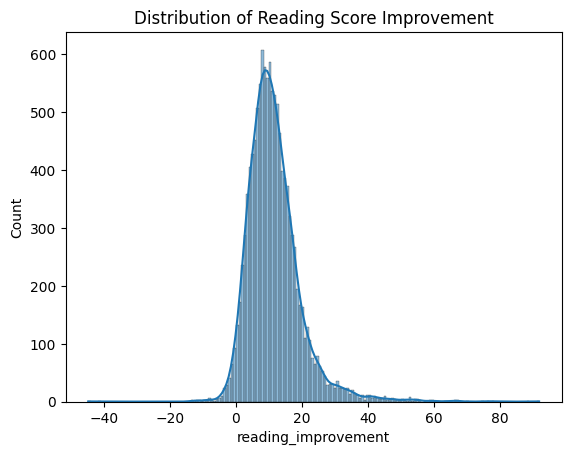

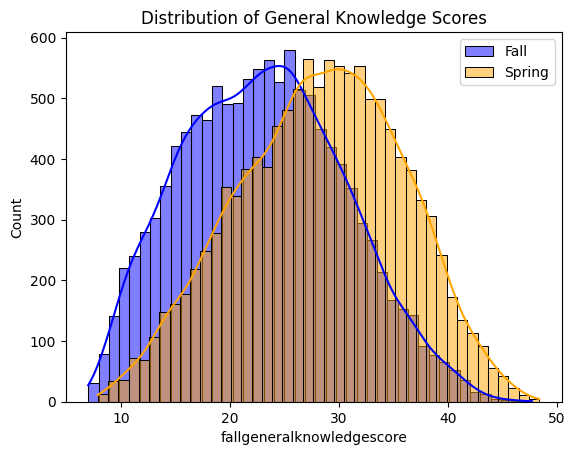

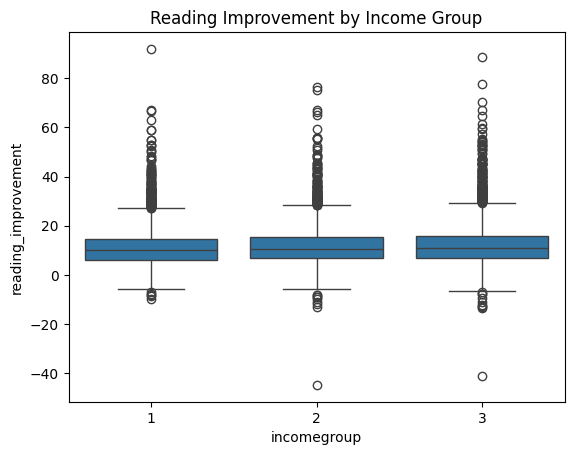

Summary statistics for reading score improvement:
count    11933.000000
mean        11.556963
std          8.085004
min        -44.760000
25%          6.470000
50%         10.400000
75%         15.150000
max         91.940000
Name: reading_improvement, dtype: float64

Summary statistics for income groups:
count    11933.000000
mean         1.895165
std          0.822692
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: incomegroup, dtype: float64

Summary statistics for general knowledge scores:
       fallgeneralknowledgescore  springgeneralknowledgescore
count               11933.000000                 11933.000000
mean                   23.073694                    28.235584
std                     7.396978                     7.577457
min                     6.985000                     7.858000
25%                    17.385000                    22.802000
50%                    22.954000                    28.583000

In [12]:
# Research Question1: Does income group have an effect on the improvement of reading scores from fall to spring, after controlling for general knowledge?

# Hypothesis1: The improvement in reading scores is different across income groups, even after accounting for baseline general knowledge levels.


# EDA 1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate reading score improvement
data['reading_improvement'] = data['springreadingscore'] - data['fallreadingscore']

# Summary statistics for reading score improvement
reading_improvement_description = data['reading_improvement'].describe()

# Visualize the distribution of reading score improvements
sns.histplot(data['reading_improvement'], kde=True)
plt.title('Distribution of Reading Score Improvement')
plt.show()

# Summary statistics for income groups
income_group_description = data['incomegroup'].describe()

# Summary statistics for general knowledge scores
general_knowledge_description = data[['fallgeneralknowledgescore', 'springgeneralknowledgescore']].describe()

# Visualize the distribution of general knowledge scores
sns.histplot(data['fallgeneralknowledgescore'], kde=True, color='blue', label='Fall')
sns.histplot(data['springgeneralknowledgescore'], kde=True, color='orange', label='Spring')
plt.title('Distribution of General Knowledge Scores')
plt.legend()
plt.show()


# Reading improvement by income group
sns.boxplot(x='incomegroup', y='reading_improvement', data=data)
plt.title('Reading Improvement by Income Group')
plt.show()

# Correlation matrix for reading improvement and general knowledge
correlation_matrix = data[['reading_improvement', 'fallgeneralknowledgescore']].corr()

# Displaying results
print('Summary statistics for reading score improvement:')
print(reading_improvement_description)
print('\nSummary statistics for income groups:')
print(income_group_description)
print('\nSummary statistics for general knowledge scores:')
print(general_knowledge_description)
print('\nCorrelation matrix:')
print(correlation_matrix)


In [13]:
# Research Question 1:
# Does income group have an effect on the improvement of reading scores from fall to spring, after controlling for general knowledge?

# ANCOVA 1

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Create a new column in the dataset for reading score improvement
data['reading_score_improvement'] = data['springreadingscore'] - data['fallreadingscore']

# Define the model formula for ANCOVA
# C(incomegroup) treats income group as a categorical variable
# reading_score_improvement is the dependent variable
# fallgeneralknowledgescore is the covariate
model_formula = 'reading_score_improvement ~ C(incomegroup) + fallgeneralknowledgescore'

# Fit the ANCOVA model
model = ols(model_formula, data=data).fit()

# Perform ANCOVA and get the results
print(model.summary())



                                OLS Regression Results                               
Dep. Variable:     reading_score_improvement   R-squared:                       0.023
Model:                                   OLS   Adj. R-squared:                  0.023
Method:                        Least Squares   F-statistic:                     95.49
Date:                       Sat, 23 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                               21:55:15   Log-Likelihood:                -41730.
No. Observations:                      11933   AIC:                         8.347e+04
Df Residuals:                          11929   BIC:                         8.350e+04
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

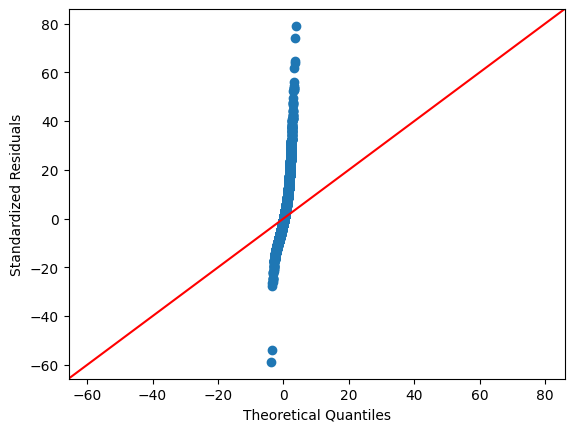

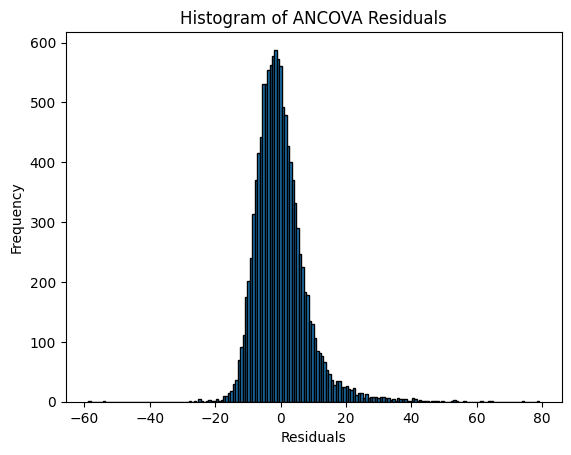

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
# Extract residuals
residuals = model.resid
residuals

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(model.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANCOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)


In [15]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
import scipy.stats as stats

# Calculate reading score improvement if not already done
data['reading_score_improvement'] = data['springreadingscore'] - data['fallreadingscore']

print(data['incomegroup'].isnull().sum())
print(data['reading_score_improvement'].isnull().sum())

# Conduct Levene's test for equal variances across income groups
levene_stat, levene_p = stats.levene(
    data['reading_score_improvement'][data['incomegroup'] == 1],
    data['reading_score_improvement'][data['incomegroup'] == 2],
    data['reading_score_improvement'][data['incomegroup'] == 3]
)

print('Levene’s test for equal variances')
print(f'Statistic: {levene_stat}')
print(f'P-value: {levene_p}')



0
0
Levene’s test for equal variances
Statistic: 19.7280103692154
P-value: 2.794929503613517e-09


In [16]:
# Research Question 2:
# Do income group and the improvement of reading score have an effect on the improvement of math scores from fall to spring, after controlling for general knowledge?


# Create a new column in the dataset for math score improvement
data['math_score_improvement'] = data['springmathscore'] - data['fallmathscore']

# Define the model formula for ANCOVA
# C(incomegroup) treats income group as a categorical variable
# reading_score_improvement is the dependent variable
# fallgeneralknowledgescore is the covariate
model_formula_2 = 'math_score_improvement ~ C(incomegroup) + reading_score_improvement + fallgeneralknowledgescore'

# Fit the ANCOVA model
model_2 = ols(model_formula_2, data=data).fit()

# Perform ANCOVA and get the results
print(model_2.summary())

                              OLS Regression Results                              
Dep. Variable:     math_score_improvement   R-squared:                       0.124
Model:                                OLS   Adj. R-squared:                  0.124
Method:                     Least Squares   F-statistic:                     422.8
Date:                    Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                            21:55:16   Log-Likelihood:                -39112.
No. Observations:                   11933   AIC:                         7.823e+04
Df Residuals:                       11928   BIC:                         7.827e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

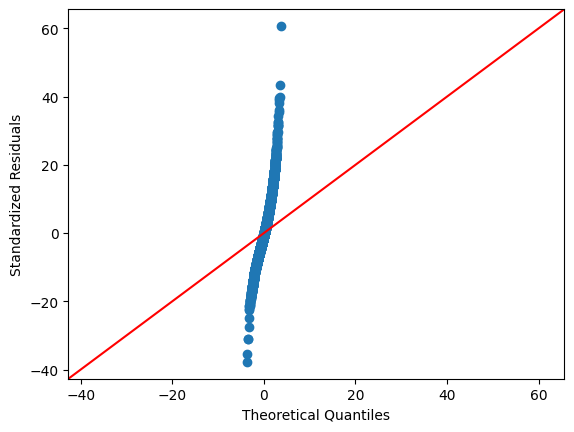

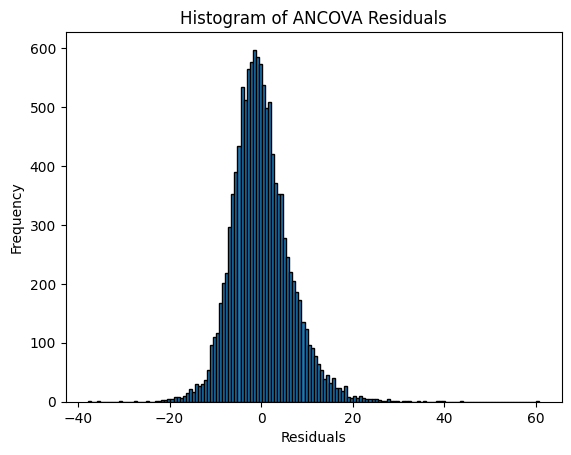

0.9701215028762817 5.324934164434305e-44


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
# Extract residuals
residuals_2 = model_2.resid
residuals_2

# assumption 1: res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(model_2.resid, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Generate histogram to inspect distribution of residuals
plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANCOVA Residuals")
plt.show()

#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model_2.resid)
print(w,pvalue)

In [18]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
import scipy.stats as stats

# Calculate reading score improvement if not already done
data['reading_score_improvement'] = data['springreadingscore'] - data['fallreadingscore']

# Conduct Levene's test for equal variances across income groups
levene_stat, levene_p = stats.levene(
    data['reading_score_improvement'][data['incomegroup'] == 1],
    data['reading_score_improvement'][data['incomegroup'] == 2],
    data['reading_score_improvement'][data['incomegroup'] == 3]
)

print('Levene’s test for equal variances')
print('Statistic:', levene_stat)
print('P-value:', levene_p)

Levene’s test for equal variances
Statistic: 19.7280103692154
P-value: 2.794929503613517e-09


In [19]:
# Research Question 3:
# How does the relationship between reading score improvement and math score improvement vary across different income groups when controlling for baseline general knowledge scores?

# Interaction ANCOVA

# Define the model formula for ANCOVA
# C(incomegroup) treats income group as a categorical variable
# reading_score_improvement is the dependent variable
# fallgeneralknowledgescore is the covariate
model_formula_1 = 'math_score_improvement ~ C(incomegroup) * reading_score_improvement + fallgeneralknowledgescore'

# Fit the ANCOVA model
model_1 = ols(model_formula_1, data=data).fit()

# Perform ANCOVA and get the results
print(model_1.summary())


                              OLS Regression Results                              
Dep. Variable:     math_score_improvement   R-squared:                       0.127
Model:                                OLS   Adj. R-squared:                  0.127
Method:                     Least Squares   F-statistic:                     289.7
Date:                    Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                            21:55:17   Log-Likelihood:                -39091.
No. Observations:                   11933   AIC:                         7.820e+04
Df Residuals:                       11926   BIC:                         7.825e+04
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [20]:
# Assuming 'data' is your DataFrame and already contains the columns 'reading_score_improvement' and 'math_score_improvement'

# Categorize reading score improvement
data['reading_score_category'] = data['reading_score_improvement'].apply(
    lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change')
)

# Categorize math score improvement
data['math_score_category'] = data['math_score_improvement'].apply(
    lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change')
)

# Check the new categories
print(data[['reading_score_improvement', 'reading_score_category', 'math_score_improvement', 'math_score_category']].head())


   reading_score_improvement reading_score_category  math_score_improvement  \
0                      12.79               Increase                   10.56   
1                      32.68               Increase                   14.49   
2                      -0.27               Decrease                    4.24   
3                       1.57               Increase                   11.68   
4                       0.86               Increase                    3.95   

  math_score_category  
0            Increase  
1            Increase  
2            Increase  
3            Increase  
4            Increase  


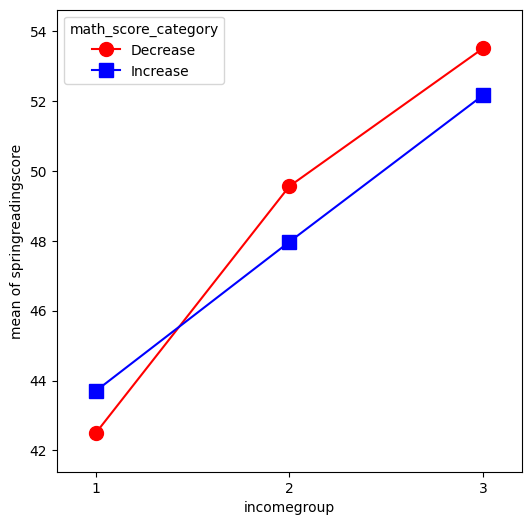

In [22]:
# Convert 'incomegroup' to string type to ensure it's treated as categorical
data['incomegroup'] = data['incomegroup'].astype(str)

#Create Interaction Plot
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(
    x=data['incomegroup'],
    trace=data['math_score_category'],
    response=data['springreadingscore'],
    colors=['red', 'blue'],
    markers=['o', 's'],
    ms=10,
    ax=ax
)
plt.show()
